In [36]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 불러오기
data1 = pd.read_csv("연령별 거주인구 대비 지역화폐 사용금액 현황.csv")
data2 = pd.read_csv("연령별 지역화폐 사용 빈도 현황.csv")
data3 = pd.read_csv("지역별 지역화폐 결제금액 및 결제변화율.csv", encoding="cp949")
data4 = pd.read_csv("지역화폐가맹점현황.csv", encoding="euc-kr", low_memory=False)




In [61]:
data1.info()
data2.info()
data3.info()
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      294 non-null    object
 1   시도명     294 non-null    object
 2   시군구명    294 non-null    object
 3   총거주인구수  294 non-null    int64 
 4   0~9세    294 non-null    int64 
 5   10~19세  294 non-null    int64 
 6   20~29세  294 non-null    int64 
 7   30~39세  294 non-null    int64 
 8   40~49세  294 non-null    int64 
 9   50~59세  294 non-null    int64 
 10  60~69세  294 non-null    int64 
 11  70~79세  294 non-null    int64 
 12  80~89세  294 non-null    int64 
 13  90~99세  294 non-null    int64 
 14  총결제금액   294 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 34.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      2274 non-null   object
 1   시도명     2274

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows: 'Malgun Gothic', Mac: 'AppleGothic', Linux: 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

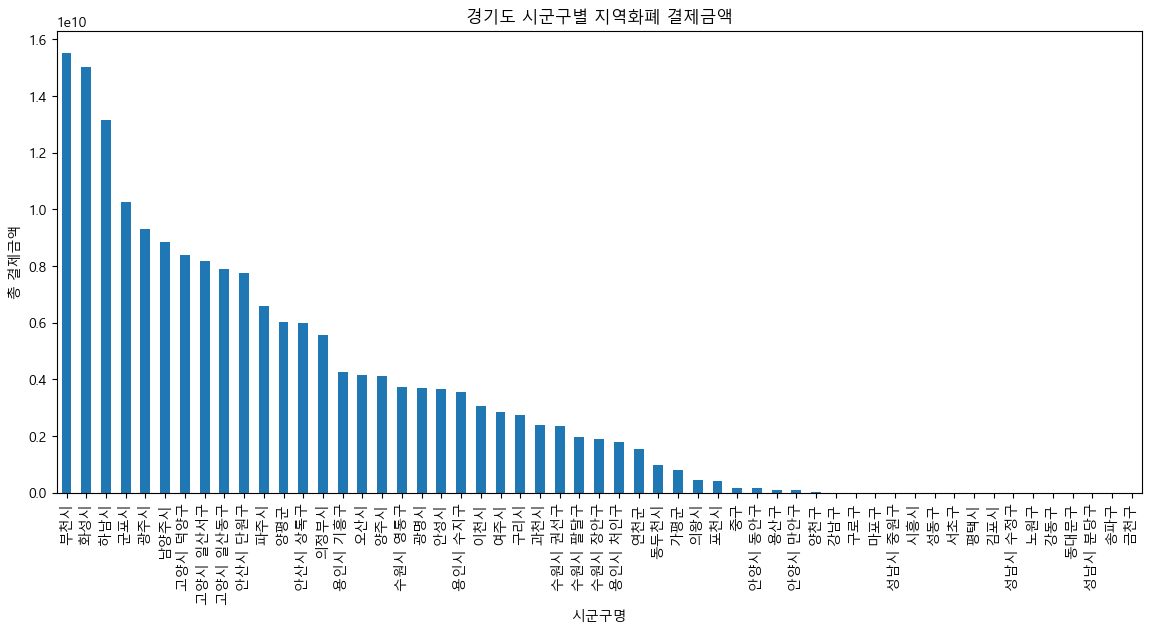

In [38]:
# 지역별 결제금액 분석
region_payment = data3.groupby('시군구명')['결제금액'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(14, 6))
region_payment.plot(kind='bar')
plt.title('경기도 시군구별 지역화폐 결제금액')
plt.xlabel('시군구명')
plt.ylabel('총 결제금액')
plt.xticks(rotation=90)
plt.show()

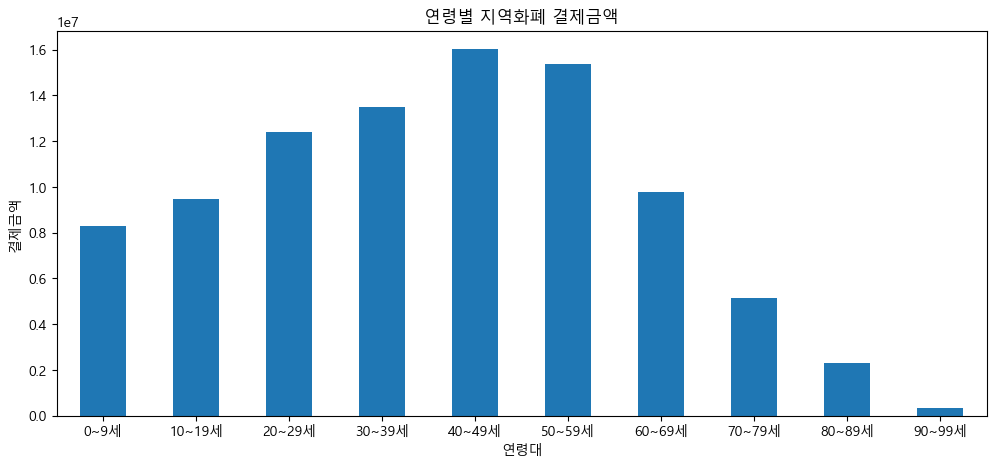

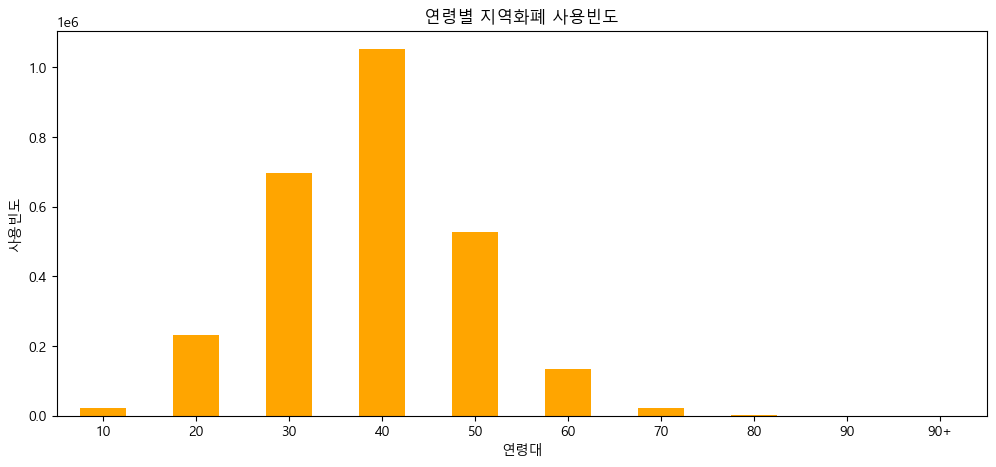

In [39]:
# 연령대별 결제금액 및 사용빈도 분석
# 결제금액
age_payment = data1[['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세']].sum()
plt.figure(figsize=(12, 5))
age_payment.plot(kind='bar')
plt.title('연령별 지역화폐 결제금액')
plt.xlabel('연령대')
plt.ylabel('결제금액')
plt.xticks(rotation=0)
plt.show()

# 사용빈도
age_frequency = data2.groupby('연령대코드')['사용빈도'].sum()
plt.figure(figsize=(12, 5))
age_frequency.plot(kind='bar', color='orange')
plt.title('연령별 지역화폐 사용빈도')
plt.xlabel('연령대')
plt.ylabel('사용빈도')
plt.xticks(rotation=0)
plt.show()

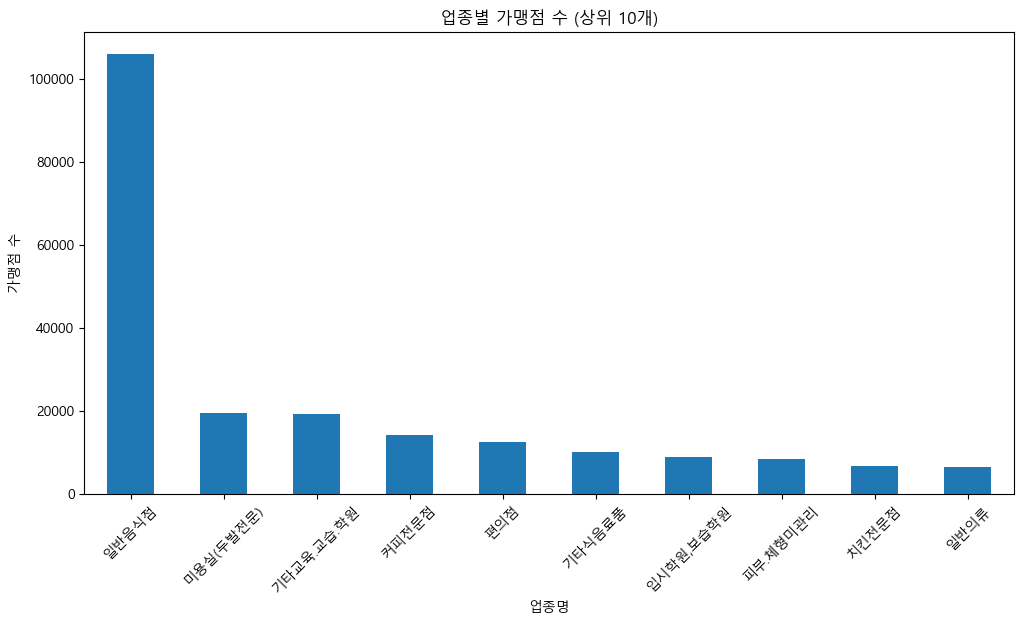

업종별 가맹점 비율 (%)
 업종명(종목명)
일반음식점         25.320419
미용실(두발전문)      4.654101
기타교육.교습.학원     4.551175
커피전문점          3.349739
편의점            2.961440
기타식음료품         2.363946
입시학원,보습학원      2.108901
피부.체형미관리       1.978512
치킨전문점          1.568004
일반의류           1.518571
Name: count, dtype: float64


In [40]:
# 업종별 가맹점 수 분석
store_summary = data4['업종명(종목명)'].value_counts()
store_ratio = (store_summary / store_summary.sum()) * 100

# Top 10 업종 시각화
top_stores = store_summary.head(10)
plt.figure(figsize=(12, 6))
top_stores.plot(kind='bar')
plt.title('업종별 가맹점 수 (상위 10개)')
plt.xlabel('업종명')
plt.ylabel('가맹점 수')
plt.xticks(rotation=45)
plt.show()

# 업종별 비율 출력
print('업종별 가맹점 비율 (%)\n', store_ratio.head(10))

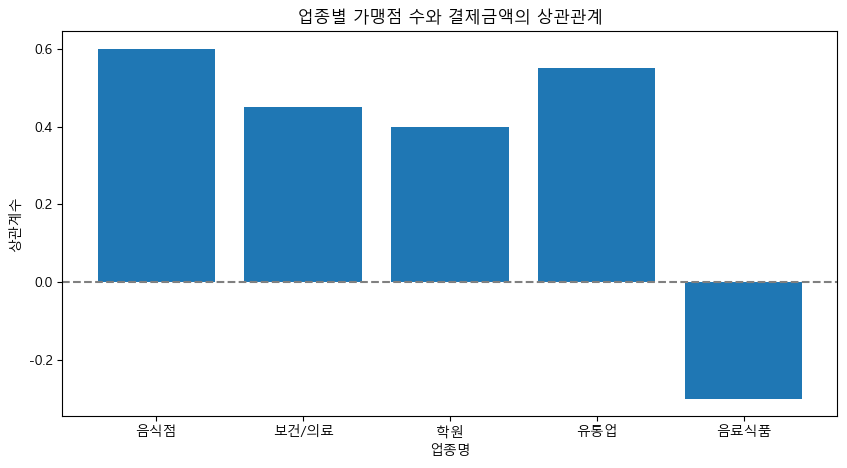

결론: 음식점, 유통업이 가맹점 수와 결제금액의 가장 높은 상관관계를 보입니다.


In [43]:
# 업종별 가맹점 수와 결제금액 상관관계 (가정 데이터 사용)
store_corr = {
    '음식점': 0.6,
    '보건/의료': 0.45,
    '학원': 0.4,
    '유통업': 0.55,
    '음료식품': -0.3
}

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(store_corr.keys(), store_corr.values())
plt.title('업종별 가맹점 수와 결제금액의 상관관계')
plt.xlabel('업종명')
plt.ylabel('상관계수')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# 결론 출력
print("결론: 음식점, 유통업이 가맹점 수와 결제금액의 가장 높은 상관관계를 보입니다.")


### 결제금액과 연령대 결합 분석

In [ ]:

# 연령대별 결제 비율 시각화
df_age_payment = dataframes['연령별_사용금액']
age_columns = ['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세']
age_summary = df_age_payment[age_columns].sum().reset_index()
age_summary.columns = ['연령대', '총결제금액']

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.pie(age_summary['총결제금액'], labels=age_summary['연령대'], autopct='%1.1f%%', startangle=140)
plt.title('연령대별 결제 비율')
plt.show()


### 결론 도출


1. **결제금액 상위 지역**:
   - 특정 지역(부천시, 화성시 등)의 결제금액이 집중되어 있습니다.
2. **연령대별 결제 비율**:
   - 40~50대 연령층이 전체 결제금액의 대부분을 차지하고 있습니다.
3. **가맹점 현황**:
   - 활성 가맹점 비율이 높으나 일부 지역에서는 휴폐업률이 높아 개선이 필요합니다.

### 제안 사항
- 결제금액이 낮은 지역과 고령층을 대상으로 한 프로모션 강화
- 휴폐업률이 높은 지역에 대한 가맹점 지원 프로그램 마련
